# Assignment 2

In [1]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
import matplotlib.pyplot as plt

torch.manual_seed(42)

In [2]:
titanic_table = pd.read_csv("./data/titanic.csv")

In [3]:
titanic_table = titanic_table[["Age", "Pclass", "SibSp", "Parch", "Fare", "Sex", "Embarked", "Survived"]]

In [4]:
titanic_table.shape

(891, 8)

In [5]:
titanic_table = titanic_table.dropna()

In [6]:
titanic_table = pd.get_dummies(titanic_table)

In [7]:
titanic_y = titanic_table.pop("Survived")

titanic_train, titanic_test, y_train, y_test = train_test_split(
    titanic_table, titanic_y, test_size=0.2, random_state=42
)

In [8]:
titanic_y.shape

(712,)

In [9]:
titanic_y.head(10)

0     0
1     1
2     1
3     1
4     0
6     0
7     0
8     1
9     1
10    1
Name: Survived, dtype: int64

In [10]:
scaler = MinMaxScaler()
#titanic_table[["Age", "Fare", "Pclass", "SibSp", "Parch"]] = scaler.fit_transform(titanic_table[["Age", "Fare", "Pclass", "SibSp", "Parch"]])
#titanic_table = scaler.transform(titanic_table)

titanic_table_2 = scaler.fit_transform(titanic_table)

In [11]:
titanic_table_2

array([[0.27117366, 1.        , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.4722292 , 0.        , 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.32143755, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.23347575, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32143755, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [12]:
titanic_table

,Age,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,3,1,0,7.2500,False,True,False,False,True
1,38.0,1,1,0,71.2833,True,False,True,False,False
2,26.0,3,0,0,7.9250,True,False,False,False,True
3,35.0,1,1,0,53.1000,True,False,False,False,True
4,35.0,3,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
885,39.0,3,0,5,29.1250,True,False,False,True,False
886,27.0,2,0,0,13.0000,False,True,False,False,True
887,19.0,1,0,0,30.0000,True,False,False,False,True
889,26.0,1,0,0,30.0000,False,True,True,False,False


In [13]:
titanic_table.head(10)

,Age,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,3,1,0,7.2500,False,True,False,False,True
1,38.0,1,1,0,71.2833,True,False,True,False,False
2,26.0,3,0,0,7.9250,True,False,False,False,True
3,35.0,1,1,0,53.1000,True,False,False,False,True
4,35.0,3,0,0,8.0500,False,True,False,False,True
6,54.0,1,0,0,51.8625,False,True,False,False,True
7,2.0,3,3,1,21.0750,False,True,False,False,True
8,27.0,3,0,2,11.1333,True,False,False,False,True
9,14.0,2,1,0,30.0708,True,False,True,False,False
10,4.0,3,1,1,16.7000,True,False,False,False,True


In [14]:
titanic_table.shape

(712, 10)

In [15]:
titanic_table.describe()

,Age,Pclass,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.642093,2.240169,0.514045,0.432584,34.567251
std,14.492933,0.836854,0.930692,0.854181,52.938648
min,0.420000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,0.000000,0.000000,8.050000
50%,28.000000,2.000000,0.000000,0.000000,15.645850
75%,38.000000,3.000000,1.000000,1.000000,33.000000
max,80.000000,3.000000,5.000000,6.000000,512.329200


In [16]:
titanic_table_2[[0,1,2], :]

array([[0.27117366, 1.        , 0.2       , 0.        , 0.01415106,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [0.4722292 , 0.        , 0.2       , 0.        , 0.13913574,
        1.        , 0.        , 1.        , 0.        , 0.        ],
       [0.32143755, 1.        , 0.        , 0.        , 0.01546857,
        1.        , 0.        , 0.        , 0.        , 1.        ]])

In [17]:
y_train.iloc[[1,2,3]]

432    1
666    0
30     0
Name: Survived, dtype: int64

In [18]:
np.array([y_train.iloc[[1,2,3]]], dtype=float).reshape(-1,1)

array([[1.],
       [0.],
       [0.]])

### Titanic Dataset

In [19]:
class TitanicDataset(Dataset):
    """Titanic dataset."""

    def __init__(self, csv_file, train=True, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            train (callable, optional): Optional to receive training (train=true) or test data.
        """

        self.transform = transform
        self.titanic_table = pd.read_csv(csv_file)
        self.train = train

        self.titanic_table = self.titanic_table[["Age", "Pclass", "SibSp", "Parch", "Fare", "Sex", "Embarked", "Survived"]]
        self.titanic_table = self.titanic_table.dropna()
        self.titanic_table = pd.get_dummies(self.titanic_table)

        self.titanic_y = self.titanic_table.pop("Survived")

        self.titanic_train, self.titanic_test, self.y_train, self.y_test = train_test_split(self.titanic_table, self.titanic_y, test_size=0.2, random_state=42)

        self.scaler = MinMaxScaler()
        self.titanic_train = self.scaler.fit_transform(self.titanic_train)
        self.titanic_test = self.scaler.transform(self.titanic_test)
    
    def __len__(self):
        if self.train:
            return len(self.titanic_train)
        return len(self.titanic_test)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        if not self.train:
            self.titanic_train = self.titanic_test
            self.y_train = self.y_test

        data = np.float32(self.titanic_train[idx,:])
        ys = np.array([self.y_train.iloc[idx]], dtype="float32").reshape(-1)

        sample = {'row': data, 'label': ys}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [20]:
titanic_train = TitanicDataset('./data/titanic.csv', train=True)
titanic_val = TitanicDataset('data/titanic.csv', train=False)

In [21]:
titanic_train.titanic_train

array([[0.40939935, 0.5       , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.52249309, 0.5       , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.30887158, 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.560191  , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.09525006, 0.5       , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.24604172, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [22]:
titanic_train.titanic_test

array([[0.2963056 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.67328474, 0.        , 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.6481528 , 0.        , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.45966323, 0.        , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.22090978, 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39683338, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [23]:
titanic_train.titanic_test.shape

(143, 10)

In [24]:
titanic_train.y_train

472    1
432    1
666    0
30     0
291    1
      ..
93     0
135    0
338    1
549    1
131    0
Name: Survived, Length: 569, dtype: int64

In [25]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        row, ys = sample['row'], sample['label']

        return {'row': torch.from_numpy(row),
                'label': torch.from_numpy(ys)}

In [35]:
num_epochs = 4
batch_size_training = 10
batch_size_validating = 20
learning_rate = 0.05
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
device = torch.device("cpu")

In [36]:
train_loader = torch.utils.data.DataLoader(TitanicDataset('./data/titanic.csv', train=True, transform=ToTensor()), batch_size=batch_size_training, shuffle=True)
train_tensor_set = TitanicDataset('./data/titanic.csv', train=True, transform=ToTensor())

test_loader = torch.utils.data.DataLoader(TitanicDataset('./data/titanic.csv', train=True, transform=ToTensor()), batch_size=batch_size_validating, shuffle=True)

In [37]:
for i, sample in enumerate(train_tensor_set):
    print(i, sample['row'].shape, sample['label'].shape)

0 torch.Size([10]) torch.Size([1])
1 torch.Size([10]) torch.Size([1])
2 torch.Size([10]) torch.Size([1])
3 torch.Size([10]) torch.Size([1])
4 torch.Size([10]) torch.Size([1])
5 torch.Size([10]) torch.Size([1])
6 torch.Size([10]) torch.Size([1])
7 torch.Size([10]) torch.Size([1])
8 torch.Size([10]) torch.Size([1])
9 torch.Size([10]) torch.Size([1])
10 torch.Size([10]) torch.Size([1])
11 torch.Size([10]) torch.Size([1])
12 torch.Size([10]) torch.Size([1])
13 torch.Size([10]) torch.Size([1])
14 torch.Size([10]) torch.Size([1])
15 torch.Size([10]) torch.Size([1])
16 torch.Size([10]) torch.Size([1])
17 torch.Size([10]) torch.Size([1])
18 torch.Size([10]) torch.Size([1])
19 torch.Size([10]) torch.Size([1])
20 torch.Size([10]) torch.Size([1])
21 torch.Size([10]) torch.Size([1])
22 torch.Size([10]) torch.Size([1])
23 torch.Size([10]) torch.Size([1])
24 torch.Size([10]) torch.Size([1])
25 torch.Size([10]) torch.Size([1])
26 torch.Size([10]) torch.Size([1])
27 torch.Size([10]) torch.Size([1])
28

In [38]:
class TwoLayerNet(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    """
    In the constructor we instantiate two nn.Linear modules and assign them as
    member variables.
    """
    super(TwoLayerNet, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, D_out)
    self.sig = torch.nn.Sigmoid()

  def forward(self, x):
    """
    In the forward function we accept a Tensor of input data and we must return
    a Tensor of output data. We can use Modules defined in the constructor as
    well as arbitrary (differentiable) operations on Tensors.
    """
    h_relu = self.linear1(x).clamp(min=0)
    y_pred = self.linear2(h_relu)
    return self.sig(y_pred)

In [39]:
# Construct model with 28*28 input, 100 neuron hidden layer, and 10 neuron output layer
network = TwoLayerNet(10, 3, 1)

# Init optimizer
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

In [40]:
# lists holding training data
train_losses = []
train_counter = []
test_losses = []
# number for each training pass
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]

In [41]:
def train(epoch):
  #network.train()

  loss_fn = torch.nn.BCELoss()
  for batch_idx, sample_batched in enumerate(train_loader):

    #print(sample_batched['row'].dtype, sample_batched['label'])
    # Set gradient to zero
    optimizer.zero_grad()
      
    # Forward pass
    output = network(sample_batched['row'])

    # Compute loss
    #print(output, sample_batched['label'])
    #loss = loss_fn(output, sample_batched['label'])
    loss = torch.nn.functional.binary_cross_entropy(output, sample_batched['label'])

    # Zero gradients, perform a backward pass, and update the weights.
    #optimizer.zero_grad()
    loss.backward()
    optimizer.step()
      
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(sample_batched['row']), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [42]:
for epoch in range(1, num_epochs + 1):
  train(epoch)

Train Epoch: 1 [0/569 (0%)]	Loss: 0.711018
Train Epoch: 1 [100/569 (18%)]	Loss: 0.694012
Train Epoch: 1 [200/569 (35%)]	Loss: 0.548301
Train Epoch: 1 [300/569 (53%)]	Loss: 0.699731
Train Epoch: 1 [400/569 (70%)]	Loss: 0.527700
Train Epoch: 1 [500/569 (88%)]	Loss: 0.657998
Train Epoch: 2 [0/569 (0%)]	Loss: 0.608973
Train Epoch: 2 [100/569 (18%)]	Loss: 0.484213
Train Epoch: 2 [200/569 (35%)]	Loss: 0.503139
Train Epoch: 2 [300/569 (53%)]	Loss: 0.359133
Train Epoch: 2 [400/569 (70%)]	Loss: 0.604697
Train Epoch: 2 [500/569 (88%)]	Loss: 0.611723
Train Epoch: 3 [0/569 (0%)]	Loss: 0.645795
Train Epoch: 3 [100/569 (18%)]	Loss: 0.278843
Train Epoch: 3 [200/569 (35%)]	Loss: 0.335381
Train Epoch: 3 [300/569 (53%)]	Loss: 0.541711
Train Epoch: 3 [400/569 (70%)]	Loss: 0.673988
Train Epoch: 3 [500/569 (88%)]	Loss: 0.398728
Train Epoch: 4 [0/569 (0%)]	Loss: 0.754393
Train Epoch: 4 [100/569 (18%)]	Loss: 0.574922
Train Epoch: 4 [200/569 (35%)]	Loss: 0.720901
Train Epoch: 4 [300/569 (53%)]	Loss: 0.337886


Text(0, 0.5, 'negative log likelihood loss')

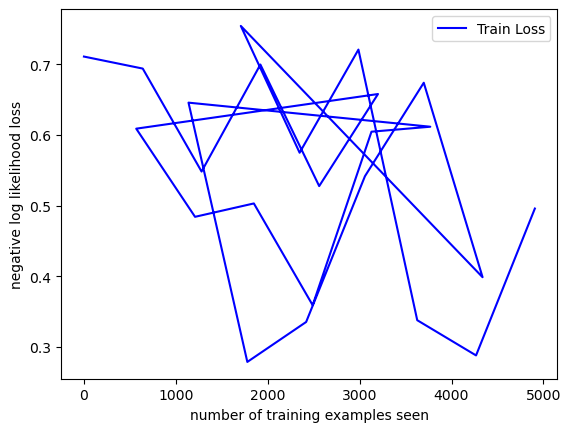

In [43]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
#plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
#fig